In [2]:
import numpy as np
import matplotlib.pyplot as plt
from numpy.fft import fft,fftshift,ifft
from celluloid import Camera
from functools import partial
def get_frequency(N):
    k = np.arange(0,2*N) - N 
    k = fftshift(k)
    k[N] = 0  
    return k

def L(u,pde='kdv',N=128):
    # 构造频率向量
    k = get_frequency(N)
    
    # 构造离散谱算子
    if pde=='burgers':
        '''
        3(u^2)_x
        '''
        return -ifft(1j*k*fft(3*u*u))
    elif pde=='kdv':
        return -ifft((1j*k)**2*fft(u))
    elif pde == 'heat':
        return ifft((1j*k)**2 * fft(u))

def ode_solver(u0,L,dt,T,N):
    u = u0
    steps = int(T/dt)
    u_path = []
    for i in range(steps):
        u_path.append(u)
        u1 = u + dt*L(u,N=N)
        u2 = 3/4*u + 1/4*u1 + 1/4*dt*L(u1,N=N)
        u = 1/3*u + 2/3*u2 + 2/3*dt*L(u2,N=N)
    return u,u_path

def ode_1(u0,L,dt,T,N):
    u = u0
    steps = int(T/dt)
    u_path = []
    for i in range(steps):
        u_path.append(u)
        u = u + dt*L(u,N=N)
    return u,u_path

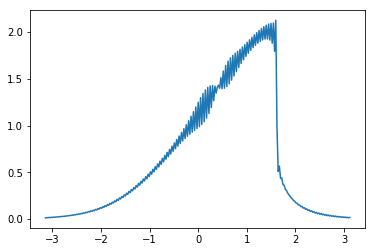

In [2]:
# 求解 burgers equation
'''
u_t + u u_x = 0
'''
N = 128
dt = 0.0001
T = 0.12
L0 = partial(L, pde='burgers')
x = np.linspace(-np.pi,np.pi,N*2,endpoint=False)
u0 = 2 / np.cosh(x)**2
u_sol,u_path = ode_1(u0,L0,dt,T,N=N)
plt.plot(x,u_sol.real)

In [50]:
## 绘制动态图
%matplotlib qt5
def simple_plot(solution,dt):
    """
    simple plot
    """
    # 生成画布
    plt.figure(figsize=(8, 6), dpi=80)

    # 打开交互模式
    plt.ion()

    # 循环
    for t in np.linspace(0,2,300):
        # 清除原有图像
        plt.cla()
        y_top = 15
        plt.ylim(-1,y_top)
        plt.plot(x,solution(t))
        plt.pause(dt)
    # 关闭交互模式
    plt.ioff()

    # 图形显示
    plt.show()

    return

In [ ]:
import numpy as np
np.split()

In [49]:
# 求解 kdv 方程
M = 2.5
N = 128
dt = 0.0001
T = 3
x = np.linspace(-10,10,N*2,endpoint=False)
L = 10/np.pi
u0 = M*(M+1)/(np.cosh(x)**2) #+ np.random.rand(u0.size)*0.1
# u0 = (x > 0) * (x < 1)

u_tilde0 = fft(u0)
k = get_frequency(N) / L
def g(t):
    return np.exp(-1j*k**3*t)

def L_kdv(u_tilde,t):
    gt = g(t)
    return -3j * k * gt * fft(ifft(1/gt * u_tilde)**2)

def ode_solver(u0,L,dt,T):
    u = u0
    u_path = []
    t = 0
    while t < T:
        u_path.append({'t':t, 'data':u})
        u1 = u + dt*L(u,t)
        u2 = 3/4*u + 1/4*u1 + 1/4*dt*L(u1,t)
        u = 1/3*u + 2/3*u2 + 2/3*dt*L(u2,t)
        t = t + dt
    u_path.append({'t':t, 'data':u})
    return u,u_path

def transform(v_path):
    u_path = []
    for item in v_path:
        t = item['t']
        v = item['data']
        gt = g(t)
        u = ifft(1/gt * v)
        u_path.append({'t':t,'data':u})
    return u,u_path

v,v_path = ode_solver(u_tilde0, L_kdv, dt, T)
u,u_path = transform(v_path)

def solution(t):
    n = int(t/dt)
    return u_path[n]['data'].real

In [52]:
simple_plot(solution,dt=0.01)

In [19]:
# 绘制静态图
plt.plot(x, solution(0),label='t=0')
plt.plot(x, solution(0.5), label='t=1.5')
plt.legend(loc='best')

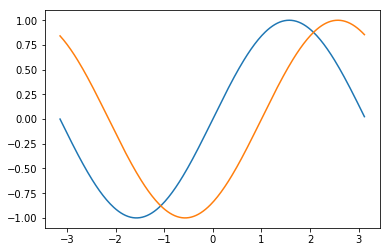

In [49]:
# 求解对流方程
'''
v_t + v_x = 0
'''
N = 128
T = 1
k = get_frequency(N)
x = np.linspace(-np.pi,np.pi,2*N,endpoint=False)
v = np.sin(x)
v_sol = ifft(np.exp(-1j*k*T)*fft(v))
plt.plot(x,v.real)
plt.plot(x,v_sol.real)

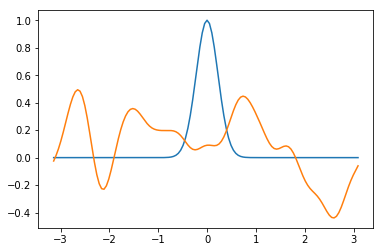

In [106]:
# 求解扩散方程
'''
u_t = u_xx
'''
N = 64
T = 12
k = get_frequency(N)
x = np.linspace(-np.pi,np.pi,2*N,endpoint=False)
v = np.exp(-10*x**2)
v_sol = ifft(np.exp((1j*k)**3*T)*fft(v))
plt.plot(x,v.real)
plt.plot(x,v_sol.real)

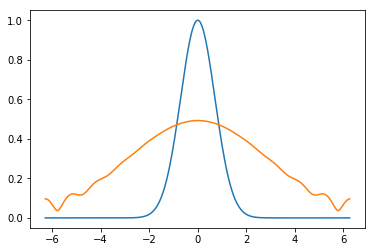

In [45]:
# 求解色散方程: 不同的空间区域需要对方程做不同的scale到[-pi,pi]上
'''
u_t = i u_xx
'''
N = 256
T = 1
k = get_frequency(N)

n = 2
z = n*np.pi
x = np.linspace(-z,z,2*N,endpoint=False)
v = np.exp(-x**2)
v_sol = ifft(np.exp(-1j*(k**2)*T/n**2)*fft(v))


plt.plot(x,np.abs(v))
plt.plot(x,np.abs(v_sol))


In [47]:
import scipy.signal as sg
fft = np.fft.fft
fft(np.arange(1,11))

array([55.+0.00000000e+00j, -5.+1.53884177e+01j, -5.+6.88190960e+00j,
       -5.+3.63271264e+00j, -5.+1.62459848e+00j, -5.-1.33226763e-15j,
       -5.-1.62459848e+00j, -5.-3.63271264e+00j, -5.-6.88190960e+00j,
       -5.-1.53884177e+01j])

In [48]:
np.fft.fftfreq(100)

array([ 0.  ,  0.01,  0.02,  0.03,  0.04,  0.05,  0.06,  0.07,  0.08,
        0.09,  0.1 ,  0.11,  0.12,  0.13,  0.14,  0.15,  0.16,  0.17,
        0.18,  0.19,  0.2 ,  0.21,  0.22,  0.23,  0.24,  0.25,  0.26,
        0.27,  0.28,  0.29,  0.3 ,  0.31,  0.32,  0.33,  0.34,  0.35,
        0.36,  0.37,  0.38,  0.39,  0.4 ,  0.41,  0.42,  0.43,  0.44,
        0.45,  0.46,  0.47,  0.48,  0.49, -0.5 , -0.49, -0.48, -0.47,
       -0.46, -0.45, -0.44, -0.43, -0.42, -0.41, -0.4 , -0.39, -0.38,
       -0.37, -0.36, -0.35, -0.34, -0.33, -0.32, -0.31, -0.3 , -0.29,
       -0.28, -0.27, -0.26, -0.25, -0.24, -0.23, -0.22, -0.21, -0.2 ,
       -0.19, -0.18, -0.17, -0.16, -0.15, -0.14, -0.13, -0.12, -0.11,
       -0.1 , -0.09, -0.08, -0.07, -0.06, -0.05, -0.04, -0.03, -0.02,
       -0.01])